In [1]:
import pandas as pd
import numpy as np

In [2]:
HR_need = pd.read_csv('/content/drive/MyDrive/HR data.csv')
HR_need

,No,Position,Level of education,field,Skill_1,Level_skill1,Skill_2,Level_skill2,Skill_3,Level_Skill3,Related_Experience,City,Number of need,benefit
0,1,data scientist,Bachelor,Computer Science,Python,Medium,Database,Low,Russian,High,2,Moscow,2,"monthly allowance, insurance"
1,2,Accountant,Bachelor,Economy,Excel,Medium,Communication,Medium,Russian,High,1,Moscow,1,"monthly allowance, insurance"
2,3,talent acquisition,Bachelor,Psychology,Certification of talent management,Medium,Communication,Medium,Russian,High,1,Moscow,1,"monthly allowance, insurance"
3,4,Public relation,Bachelor,Communication,Communication,Medium,Excel,Medium,English,Medium,3,Moscow,2,"monthly allowance, insurance"


In [3]:
cand = pd.read_csv('/content/drive/MyDrive/candidate.csv')
cand

,No,Name,Level of education,field,Skill1,Level_1,Skill2,Level_2,Skill3,Level_3,Related_Experience,City,Position
0,1,Hartomy,Master,Computer Science,Python,Medium,Database,High,Russian,High,5,Moscow,data scientist
1,2,Gian,Master,Computer Science,Python,High,Database,Medium,Russian,Medium,3,Kazan,data scientist
2,3,Made Oka,Bachelor,Computer Science,Python,Low,Database,High,Russian,High,4,Moscow,data scientist
3,3,Rivaldo,Bachelor,Computer Science,Python,High,Database,Low,Russian,Medium,2,Kazan,data scientist
4,4,Gusti,Bachelor,Computer Science,Python,Medium,Database,High,Russian,High,1,Moscow,data scientist
5,5,Utih,Master,Economy,Python,High,Database,Low,Russian,Medium,3,Kazan,data scientist
6,6,Budi,Bachelor,Psychology,Certification of talent management,High,Communication,High,Russian,Low,2,Moscow,talent acquisition
7,7,Bunga,Bachelor,Psychology,Certification of talent management,Medium,Communication,High,Russian,High,1,Kazan,talent acquisition
8,8,Ani,Master,Psychology,Communication,High,Excel,High,Russian,Medium,1,Moscow,talent acquisition
9,9,Andi,Doctor,Computer Science,Python,Medium,Database,Medium,Russian,High,5,Moscow,data scientist


In [4]:
#Convert level to number
def lev(what, form_):
  list_level = []
  for i in form_[what]:
    if i == 'Bachelor' or i == 'Low':
      list_level.append(1)
    elif i == 'Master' or i == 'Medium':
      list_level.append(2)
    elif i == 'Doctor' or i == 'High':
      list_level.append(3)
    else:
      list_level.append(0)
  form_['newlevel_'+ what] = list_level

In [5]:
lev('Level of education', HR_need)
lev('Level_skill1', HR_need)
lev('Level_skill2', HR_need)
lev('Level_Skill3', HR_need)
HR_need

,No,Position,Level of education,field,Skill_1,Level_skill1,Skill_2,Level_skill2,Skill_3,Level_Skill3,Related_Experience,City,Number of need,benefit,newlevel_Level of education,newlevel_Level_skill1,newlevel_Level_skill2,newlevel_Level_Skill3
0,1,data scientist,Bachelor,Computer Science,Python,Medium,Database,Low,Russian,High,2,Moscow,2,"monthly allowance, insurance",1,2,1,3
1,2,Accountant,Bachelor,Economy,Excel,Medium,Communication,Medium,Russian,High,1,Moscow,1,"monthly allowance, insurance",1,2,2,3
2,3,talent acquisition,Bachelor,Psychology,Certification of talent management,Medium,Communication,Medium,Russian,High,1,Moscow,1,"monthly allowance, insurance",1,2,2,3
3,4,Public relation,Bachelor,Communication,Communication,Medium,Excel,Medium,English,Medium,3,Moscow,2,"monthly allowance, insurance",1,2,2,2


In [6]:
lev('Level of education', cand)
lev('Level_1', cand)
lev('Level_2', cand)
lev('Level_3', cand)
cand

,No,Name,Level of education,field,Skill1,Level_1,Skill2,Level_2,Skill3,Level_3,Related_Experience,City,Position,newlevel_Level of education,newlevel_Level_1,newlevel_Level_2,newlevel_Level_3
0,1,Hartomy,Master,Computer Science,Python,Medium,Database,High,Russian,High,5,Moscow,data scientist,2,2,3,3
1,2,Gian,Master,Computer Science,Python,High,Database,Medium,Russian,Medium,3,Kazan,data scientist,2,3,2,2
2,3,Made Oka,Bachelor,Computer Science,Python,Low,Database,High,Russian,High,4,Moscow,data scientist,1,1,3,3
3,3,Rivaldo,Bachelor,Computer Science,Python,High,Database,Low,Russian,Medium,2,Kazan,data scientist,1,3,1,2
4,4,Gusti,Bachelor,Computer Science,Python,Medium,Database,High,Russian,High,1,Moscow,data scientist,1,2,3,3
5,5,Utih,Master,Economy,Python,High,Database,Low,Russian,Medium,3,Kazan,data scientist,2,3,1,2
6,6,Budi,Bachelor,Psychology,Certification of talent management,High,Communication,High,Russian,Low,2,Moscow,talent acquisition,1,3,3,1
7,7,Bunga,Bachelor,Psychology,Certification of talent management,Medium,Communication,High,Russian,High,1,Kazan,talent acquisition,1,2,3,3
8,8,Ani,Master,Psychology,Communication,High,Excel,High,Russian,Medium,1,Moscow,talent acquisition,2,3,3,2
9,9,Andi,Doctor,Computer Science,Python,Medium,Database,Medium,Russian,High,5,Moscow,data scientist,3,2,2,3


In [17]:
a = cand[cand['Position'] == 'data scientist'].copy()
a.index = list(range(len(a)))
a

,No,Name,Level of education,field,Skill1,Level_1,Skill2,Level_2,Skill3,Level_3,Related_Experience,City,Position,newlevel_Level of education,newlevel_Level_1,newlevel_Level_2,newlevel_Level_3
0,1,Hartomy,Master,Computer Science,Python,Medium,Database,High,Russian,High,5,Moscow,data scientist,2,2,3,3
1,2,Gian,Master,Computer Science,Python,High,Database,Medium,Russian,Medium,3,Kazan,data scientist,2,3,2,2
2,3,Made Oka,Bachelor,Computer Science,Python,Low,Database,High,Russian,High,4,Moscow,data scientist,1,1,3,3
3,3,Rivaldo,Bachelor,Computer Science,Python,High,Database,Low,Russian,Medium,2,Kazan,data scientist,1,3,1,2
4,4,Gusti,Bachelor,Computer Science,Python,Medium,Database,High,Russian,High,1,Moscow,data scientist,1,2,3,3
5,5,Utih,Master,Economy,Python,High,Database,Low,Russian,Medium,3,Kazan,data scientist,2,3,1,2
6,9,Andi,Doctor,Computer Science,Python,Medium,Database,Medium,Russian,High,5,Moscow,data scientist,3,2,2,3
7,14,Abdul,Master,Computer Science,Python,High,Database,Low,Russian,Medium,0,Moscow,data scientist,2,3,1,2
8,19,Baba,Doctor,Computer Science,Python,Medium,Database,High,Russian,Low,1,Moscow,data scientist,3,2,3,1
9,24,Tuti,Bachelor,Computer Science,Python,High,Database,Medium,Russian,High,3,Moscow,data scientist,1,3,2,3


In [40]:
def match(job, top):
  match = []
  add_score = []
  dc = cand[cand['Position'] == job]
  ind = list(range(len(dc)))
  dc.index = ind
  dh = HR_need[HR_need['Position'] == job]
  skillHR_list = [dh['Skill_1'].values[0], dh['Skill_2'].values[0], dh['Skill_3'].values[0]]
  levelHR_list = [dh['newlevel_Level_skill1'].values[0], dh['newlevel_Level_skill2'].values[0], dh['newlevel_Level_Skill3'].values[0]]
  el = int(dh['newlevel_Level of education'].values[0])
  exh = int(dh['Related_Experience'].values[0])
  ch = dh['City'].values[0]

  for i in range(len(dc)):
    m = 0
    s = 0
    edc = dc['newlevel_Level of education'][i]
    if edc >= el:
      m = m + 1
      s = s + (edc - el)

    if dc['field'][i] == dh['field'].values[0]:
      m = m + 1
    
    #skill
    skillcan_list = [dc['Skill1'][i], dc['Skill2'][i], dc['Skill3'][i]]
    levelcan_list = [dc['newlevel_Level_1'][i], dc['newlevel_Level_2'][i], dc['newlevel_Level_3'][i]]

    for j, skill_ in enumerate(skillHR_list):
      if str(skill_) in skillcan_list:
        m = m + 1
        if levelcan_list[skillcan_list.index(skill_)] >= levelHR_list[j]:
          m = m+1
          s = s + (levelcan_list[skillcan_list.index(skill_)] - levelHR_list[j])
          
    #experience
    exc = int(dc['Related_Experience'][i])
    if exc >= exh:
      m = m + 1
      s = s + (exc - exh)
    
    #city
    if dc['City'][i] == ch:
      m = m+1
    
    match.append(m*10)
    add_score.append(s*10)
  dc['match'] = match
  dc['add_score'] = add_score
  d_sort = dc.sort_values(by=['match', 'add_score'], ascending=False)
  dtop = d_sort.head(top)

  df = pd.DataFrame({'match': dtop['match'].values,
                   'add_score': dtop['add_score'].values}, index=dtop['Name'].values)
  ax = df.plot.bar(stacked=True)

  return d_sort, dtop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,No,Name,Level of education,field,Skill1,Level_1,Skill2,Level_2,Skill3,Level_3,Related_Experience,City,Position,newlevel_Level of education,newlevel_Level_1,newlevel_Level_2,newlevel_Level_3,match,add_score
8,26,Lia,Doctor,Psychology,Certification of talent management,High,Russian,Low,Communication,Medium,5,Moscow,talent acquisition,3,3,1,2,90,70
5,18,Santi,Master,Law,Russian,High,Communication,Medium,Certification of talent management,High,5,Moscow,talent acquisition,2,3,2,3,90,60
6,21,Kiki,Master,Psychology,Russian,Medium,Communication,Medium,Certification of talent management,High,5,Moscow,talent acquisition,2,2,2,3,90,60
4,16,Deva,Doctor,Psychology,Communication,High,Russian,High,Certification of talent management,Low,2,Moscow,talent acquisition,3,3,3,1,90,40
0,6,Budi,Bachelor,Psychology,Certification of talent management,High,Communication,High,Russian,Low,2,Moscow,talent acquisition,1,3,3,1,90,30


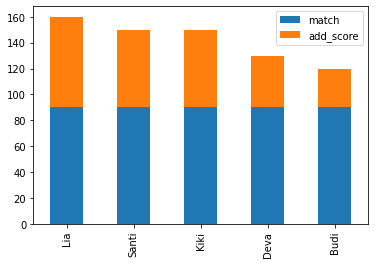

In [44]:
df_all, df_top = match('talent acquisition', 5)
df_top